<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/SbRcpW).**

In [172]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [9]:
data = pd.read_csv('data/train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [10]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_category
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.814815
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.801995
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [13]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [14]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [15]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [16]:
age_categories = [age_category(age) for age in data.Age]

In [17]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [18]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин

**- 577 мужчин и 314 женщин - YES**

In [32]:
print("Количество мужчин и женщин на борту:")
dict(data['Sex'].value_counts().rename({'male' : 'мужчины', 'female' : 'женщины'}))

Количество мужчин и женщин на борту:


{'мужчины': 577, 'женщины': 314}

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104

**- 108**
- 112
- 125

In [188]:
sns.set(rc={'figure.figsize':(14,10)})

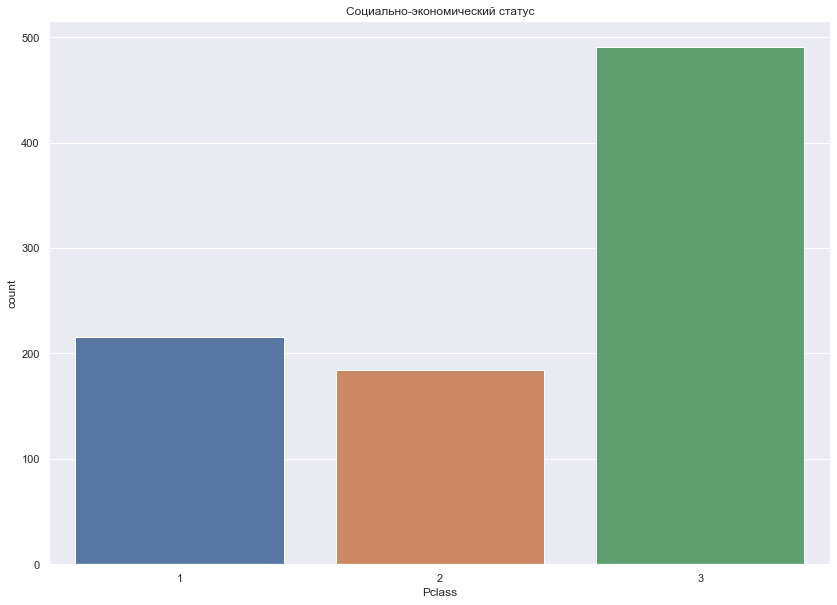

In [189]:
plt.title('Социально-экономический статус')
sns.countplot(x='Pclass', data=data);

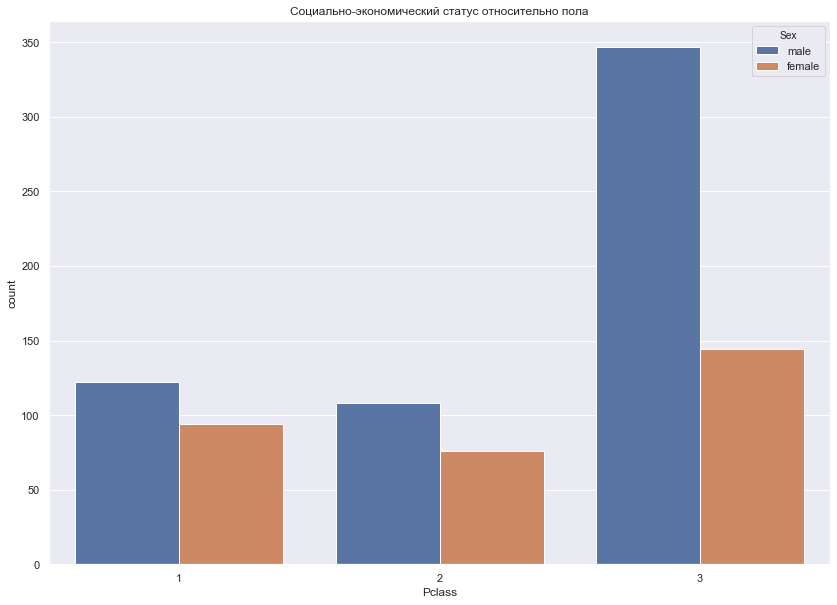

In [190]:
plt.title('Социально-экономический статус относительно пола')
sns.countplot(x='Pclass', hue='Sex', data=data);

In [171]:
man_second_class = len(data.query('Sex == "male" and Pclass == "2" ').index)
print('Количество мужчин 2-го класса:', man_second_class)

Количество мужчин 2-го класса: 108


**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**

**- Медиана – 14.45, стандартное отклонение – 49.69 - YES**
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [132]:
data.describe()['Fare']

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [134]:
fare_median = round(data.describe()['Fare']['50%'], 2)
fare_std = round(data.describe()['Fare']['std'], 2)

print('Медиана для Fare:', fare_median)
print('Стандартное отклонение для Fare:', fare_std)

Медиана для Fare: 14.45
Стандартное отклонение для Fare: 49.69


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых

**- 40.6% среди молодых и 22.7% среди старых - YES**
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [289]:
#нужно немного изменить определение функции

def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 60 -> 3
    '''
    if age < 30:
        return 1
    elif age > 60:    
        return 2
    else:
        return 3 #элегантно закинул NaN-ы в возрасте под ковёр, вопрос, как стоило правильно проверять на них

In [290]:
data['Age_category'] = data['Age'].apply(age_category)

In [291]:
def age_survival_ratio(df, age_category):
    age_category_total = df.query(f'Age_category == "{age_category}"').shape[0]
    
    age_category_survived = df.query(f'Age_category == "{age_category}" and Survived == "1"').shape[0]
    coeff = round(age_category_survived / age_category_total, 3) * 100
    
    return coeff

In [292]:
print(f'Доля выживших среди молодёжи возрастом до 30 лет: {age_survival_ratio(data, 1)}%')
print(f'Доля выживших среди стариков возрастом от 60 лет: {age_survival_ratio(data, 2)}%')

Доля выживших среди молодёжи возрастом до 30 лет: 40.6%
Доля выживших среди стариков возрастом от 60 лет: 22.7%


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин

**- 18.9% среди мужчин и 74.2% среди женщин - YES**

In [218]:
def gender_survival_ratio(df, sex):
    gender_total = df.query(f'Sex == "{sex}"').shape[0]
    
    gender_survived = df.query(f'Sex == "{sex}" and Survived == "1"').shape[0]
    coeff = round(gender_survived / gender_total, 3) * 100
    
    return coeff

In [217]:
print(f'Доля выживших мужчин: {gender_survival_ratio(data, "male")}%')
print(f'Доля выживших женщин: {gender_survival_ratio(data, "female")}%')

Доля выживших мужчин: 18.9%
Доля выживших женщин: 74.2%


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas

**- William - YES**
- John

In [81]:
import re

In [126]:
#Нам нужно first name
#Если пробежаться глазами по списку всех имён, то можно заметить, что оно всегда идёт после точки (Mr./Master./Rev./etc)
#Построил регулярку и проверил вначале на одном имени

male_name = 'Mr. Sandman Henry'
match = re.findall("(?<=\. )[a-zA-z]+", male_name)

print("Результат работы регулярного выражения:", match)
print("Тип возвращённого значения:", type(match))

Результат работы регулярного выражения: ['Sandman']
Тип возвращённого значения: <class 'list'>


In [123]:
#Так как у нас возвращается массив, будем забирать из него элемент

male_names = data.query("Sex == 'male'")['Name']\
                        .apply(lambda male_name: re.findall("(?<=\. )([a-zA-z]+)", male_name)[0])

In [125]:
#это не единственный способ, но мне он кажется самым простым

most_common_male_name = male_names.value_counts().keys()[0]

print('Самое популярное мужское имя на корабле:', most_common_male_name)

Самое популярное мужское имя на корабле: William


**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 

**- Нет - YES - Видимо, среди бедных было много молодых**

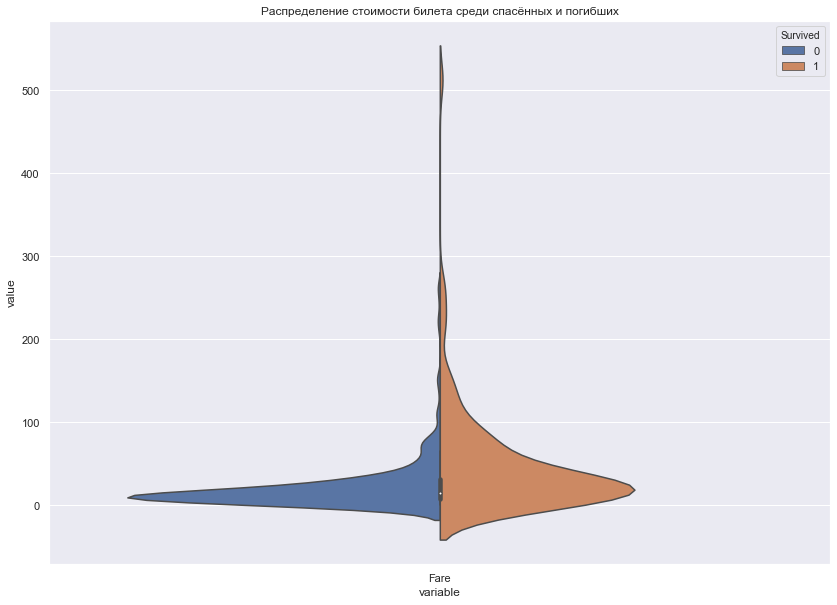

In [326]:
#Стоимость билета

df = pd.melt(data, value_vars=['Fare'], id_vars='Survived')

plt.title('Распределение стоимости билета среди спасённых и погибших')
sns.violinplot(x='variable', y='value', hue='Survived', data=df, scale='count', split=True);

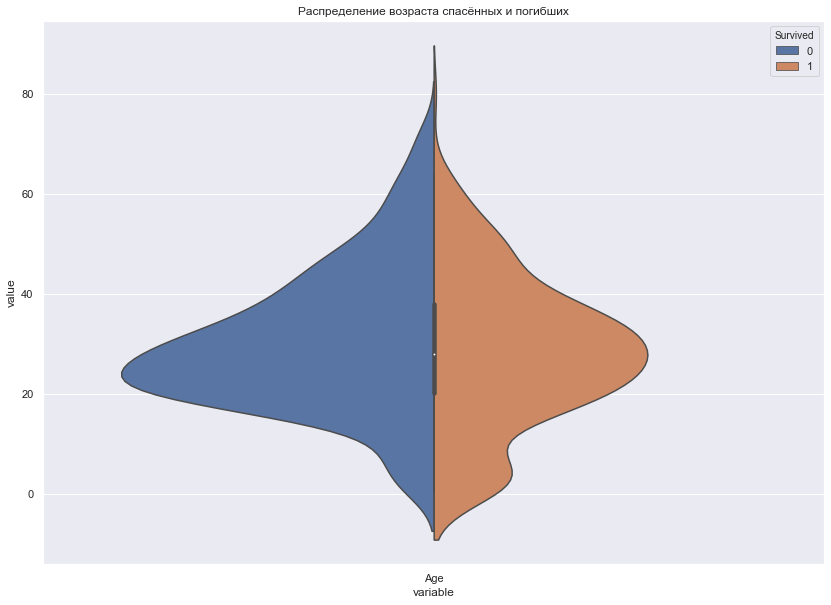

In [309]:
#Возраст

df = pd.melt(data, value_vars=['Age'], id_vars='Survived')

plt.title('Распределение возраста спасённых и погибших')
sns.violinplot(x='variable', y='value', hue='Survived', data=df, scale='count', split=True);

In [327]:
#Для самоконтроля

age_mean_survived = round(df[df['Survived'] == 0]['value'].mean(), 2)
age_mean_dead = round(df[df['Survived'] == 1]['value'].mean(), 2)

print('Средний возраст погибших:', age_mean_dead)
print('Средний возраст выживших:', age_mean_survived)

Средний возраст погибших: 48.4
Средний возраст выживших: 22.12


**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**

**- В среднем мужчины 1-го класса старше 40 лет - YES**

- В среднем женщины 1-го класса старше 40 лет

**- Мужчины всех классов в среднем старше женщин того же класса - YES**

**- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса - YES**

In [350]:
#Начала нравиться обычная индексация, без query :)

male_pclass_1_age_mean = round(data[(data['Pclass'] == 1) & (data['Sex'] == 'male')]['Age'].mean(), 2)
print('Средний возраст мужчин из 1-го класса:', male_pclass_1_age_mean)

female_pclass_1_age_mean = round(data[(data['Pclass'] == 1) & (data['Sex'] == 'female')]['Age'].mean(), 2)
print('Средний возраст женщин из 1-го класса:', female_pclass_1_age_mean)

Средний возраст мужчин из 1-го класса: 41.28
Средний возраст женщин из 1-го класса: 34.61


In [351]:
male_pclass_2_age_mean = round(data[(data['Pclass'] == 2) & (data['Sex'] == 'male')]['Age'].mean(), 2)
print('Средний возраст мужчин из 2-го класса:', male_pclass_2_age_mean)

female_pclass_2_age_mean = round(data[(data['Pclass'] == 2) & (data['Sex'] == 'female')]['Age'].mean(), 2)
print('Средний возраст женщин из 2-го класса:', female_pclass_2_age_mean)

Средний возраст мужчин из 2-го класса: 30.74
Средний возраст женщин из 2-го класса: 28.72


In [352]:
male_pclass_3_age_mean = round(data[(data['Pclass'] == 3) & (data['Sex'] == 'male')]['Age'].mean(), 2)
print('Средний возраст мужчин из 3-го класса:', male_pclass_3_age_mean)

female_pclass_3_age_mean = round(data[(data['Pclass'] == 3) & (data['Sex'] == 'female')]['Age'].mean(), 2)
print('Средний возраст женщин из 3-го класса:', female_pclass_3_age_mean)

Средний возраст мужчин из 3-го класса: 26.51
Средний возраст женщин из 3-го класса: 21.75


In [353]:
pclass_1_age_mean = round(data[(data['Pclass'] == 1)]['Age'].mean(), 2)
pclass_2_age_mean = round(data[(data['Pclass'] == 2)]['Age'].mean(), 2)
pclass_3_age_mean = round(data[(data['Pclass'] == 3)]['Age'].mean(), 2)


print('Средний возраст людей из 1-го класса:', pclass_1_age_mean)
print('Средний возраст людей из 2-го класса:', pclass_2_age_mean)
print('Средний возраст людей из 3-го класса:', pclass_3_age_mean)

Средний возраст людей из 1-го класса: 38.23
Средний возраст людей из 2-го класса: 29.88
Средний возраст людей из 3-го класса: 25.14
